### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Analisis de facturacion

Tarea 1:
En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [2]:
# Calculamos el ingreso total de cada tienda sumando los valores de la columna 'Precio'
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum() 
ingreso_tienda4 = tienda4['Precio'].sum()

# Creamos un diccionario con los nombres de las tiendas y sus ingresos
ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
}

# Convertimos el diccionario a un DataFrame para visualizarlo mejor
df_ingresos = pd.DataFrame(ingresos)

# Formateamos los valores para que sean más legibles
df_ingresos['Ingreso Total'] = df_ingresos['Ingreso Total'].map('{:,.0f}'.format)

# Mostramos la tabla con los ingresos totales
print("Ingresos totales por tienda:")
df_ingresos

Ingresos totales por tienda:


,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


# 2. Ventas por categoría

Tarea 2:
En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [3]:
# Contamos productos por categoría para cada tienda
categorias_tienda1 = tienda['Categoría del Producto'].value_counts().reset_index()
categorias_tienda2 = tienda2['Categoría del Producto'].value_counts().reset_index()
categorias_tienda3 = tienda3['Categoría del Producto'].value_counts().reset_index()
categorias_tienda4 = tienda4['Categoría del Producto'].value_counts().reset_index()

# Renombramos las columnas para mayor claridad
categorias_tienda1.columns = ['Categoría', 'Cantidad Tienda 1']
categorias_tienda2.columns = ['Categoría', 'Cantidad Tienda 2']
categorias_tienda3.columns = ['Categoría', 'Cantidad Tienda 3']
categorias_tienda4.columns = ['Categoría', 'Cantidad Tienda 4']

# Combinamos los resultados en un único DataFrame usando la categoría como clave
# Primero combinamos tienda 1 y 2
categorias_combinadas = pd.merge(categorias_tienda1, categorias_tienda2, on='Categoría', how='outer')

# Luego añadimos tienda 3 y 4
categorias_combinadas = pd.merge(categorias_combinadas, categorias_tienda3, on='Categoría', how='outer')
categorias_combinadas = pd.merge(categorias_combinadas, categorias_tienda4, on='Categoría', how='outer')

# Reemplazamos los valores NaN por 0 (para categorías que no existen en alguna tienda)
categorias_combinadas = categorias_combinadas.fillna(0)

# Convertimos los valores a enteros
columnas_cantidad = ['Cantidad Tienda 1', 'Cantidad Tienda 2', 'Cantidad Tienda 3', 'Cantidad Tienda 4']
categorias_combinadas[columnas_cantidad] = categorias_combinadas[columnas_cantidad].astype(int)

# Ordenamos por la suma total de productos vendidos (todas las tiendas)
categorias_combinadas['Total'] = categorias_combinadas[columnas_cantidad].sum(axis=1)
categorias_combinadas = categorias_combinadas.sort_values(by='Total', ascending=False)

# Mostramos el resultado
print("Cantidad de productos vendidos por categoría en cada tienda:")
categorias_combinadas

Cantidad de productos vendidos por categoría en cada tienda:


,Categoría,Cantidad Tienda 1,Cantidad Tienda 2,Cantidad Tienda 3,Cantidad Tienda 4,Total
7,Muebles,465,442,499,480,1886
3,Electrónicos,448,422,451,451,1772
5,Juguetes,324,313,315,338,1290
2,Electrodomésticos,312,305,278,254,1149
1,Deportes y diversión,284,275,277,277,1113
4,Instrumentos musicales,182,224,177,170,753
6,Libros,173,197,185,187,742
0,Artículos para el hogar,171,181,177,201,730


# 3. Calificación promedio de la tienda


Tarea 3:
En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [4]:
# Calculamos la calificación promedio de cada tienda
calificacion_tienda1 = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

# Creamos un diccionario con los nombres de las tiendas y sus calificaciones promedio
calificaciones = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
}

# Convertimos el diccionario a un dataFrame
df_calificaciones = pd.DataFrame(calificaciones)

# Redondeamos las calificaciones a 2 decimales para mejor visualización
df_calificaciones['Calificación Promedio'] = df_calificaciones['Calificación Promedio'].round(2)

# Mostramos la tabla con las calificaciones promedio
print("Calificación promedio por tienda:")
df_calificaciones

Calificación promedio por tienda:


,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

Tarea 4:
En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [5]:

# Agrupamos los DataFrames en una lista para poder iterar sobre ellos.
lista_tiendas = [tienda, tienda2, tienda3, tienda4]

# Usamos un ciclo para procesar cada tienda
for i, df_tienda in enumerate(lista_tiendas):
    
    # El 'i+1' es para que el número de tienda sea 1, 2, 3, 4 en lugar de 0, 1, 2, 3
    numero_tienda = i + 1

    # Identificamos los productos para cada tienda en el ciclo
    conteo_productos = df_tienda['Producto'].value_counts().reset_index()
    conteo_productos.columns = ['Producto', 'Cantidad']
    
    top_5 = conteo_productos.head(5)
    bottom_5 = conteo_productos.tail(5)

    # 3. Mostramos los resultados para la tienda actual usando f-strings
    print(f"--- Resultados para la Tienda {numero_tienda} ---")
    
    print(f"\nTop 5 productos más vendidos:")
    print(top_5) # Python muestra muy bien los DataFrames al imprimirlos
    
    print(f"\n5 productos menos vendidos:")
    print(bottom_5)
    
    print("\n" + "="*40 + "\n") # Un separador para que se vea más ordenado

--- Resultados para la Tienda 1 ---

Top 5 productos más vendidos:
           Producto  Cantidad
0        Microondas        60
1     TV LED UHD 4K        60
2           Armario        60
3  Secadora de ropa        58
4     Mesa de noche        56

5 productos menos vendidos:
                       Producto  Cantidad
46  Ciencia de datos con Python        39
47                    Pandereta        36
48              Olla de presión        35
49    Auriculares con micrófono        33
50                 Celular ABXY        33


--- Resultados para la Tienda 2 ---

Top 5 productos más vendidos:
                    Producto  Cantidad
0  Iniciando en programación        65
1                 Microondas        62
2                    Batería        61
3          Guitarra acústica        58
4                  Pandereta        58

5 productos menos vendidos:
           Producto  Cantidad
46      Auriculares        37
47           Sillón        35
48  Mesa de comedor        34
49        Impresora 

# 5. Envío promedio por tienda

Tarea 5: 
En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [6]:
# Calculamos el costo de envío promedio para cada tienda
envio_tienda1 = tienda['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()

# Creamos un diccionario con los nombres de las tiendas y sus costos de envío promedio
envios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
}

# Convertimos el diccionario a un DataFrame
df_envios = pd.DataFrame(envios)

# Formateamos los valores para que sean más legibles
df_envios['Costo de Envío Promedio'] = df_envios['Costo de Envío Promedio'].round(2)

# Calculamos también el porcentaje que representa el costo de envío respecto al precio promedio
precio_promedio_t1 = tienda['Precio'].mean()
precio_promedio_t2 = tienda2['Precio'].mean()
precio_promedio_t3 = tienda3['Precio'].mean()
precio_promedio_t4 = tienda4['Precio'].mean()

# Añadimos columnas con el precio promedio y el porcentaje
df_envios['Precio Promedio'] = [precio_promedio_t1, precio_promedio_t2, precio_promedio_t3, precio_promedio_t4]
df_envios['Precio Promedio'] = df_envios['Precio Promedio'].round(2)

df_envios['% Envío del Precio'] = (df_envios['Costo de Envío Promedio'] / df_envios['Precio Promedio'] * 100).round(2)

# Mostramos la tabla con los costos de envío promedio
print("Costo de envío promedio por tienda:")
df_envios

Costo de envío promedio por tienda:


,Tienda,Costo de Envío Promedio,Precio Promedio,% Envío del Precio
0,Tienda 1,26018.61,487867.91,5.33
1,Tienda 2,25216.24,473227.43,5.33
2,Tienda 3,24805.68,465459.77,5.33
3,Tienda 4,23459.46,440362.89,5.33


# 6. Representación de datos

Tarea 6:

Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su análisis.

## Grafico 1 de barras comparativo de ingresos totales

 Ingresos totales de cada tienda:
 Este gráfico permitirá visualizar de manera inmediata las diferencias en ingresos entre las cuatro tiendas. 

Matplotlib is building the font cache; this may take a moment.


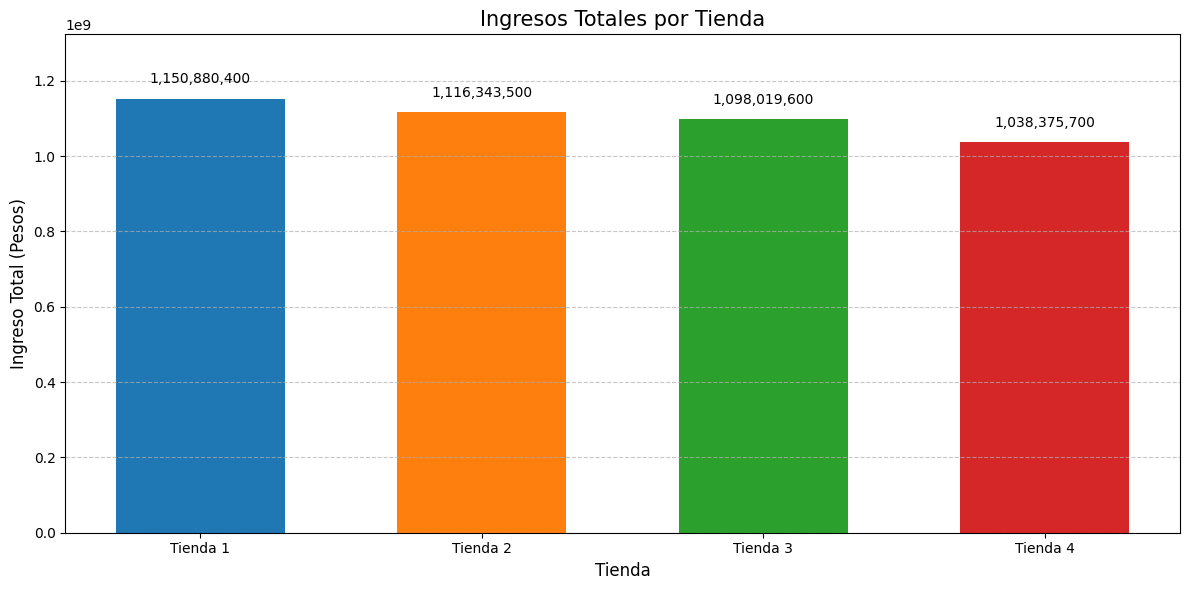

In [7]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt

# Calculamos el ingreso total de cada tienda (este paso puede omitirse si ya tienes los valores calculados)
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum() 
ingreso_tienda4 = tienda4['Precio'].sum()

# Creamos un diccionario con los nombres de las tiendas y sus ingresos
ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
}

# Definimos colores para cada tienda
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # azul, naranja, verde, rojo

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras
barras = plt.bar(
    ingresos['Tienda'], 
    ingresos['Ingreso Total'],
    color=colores,
    width=0.6
)

# Ajustamos los límites del eje Y para que haya espacio para los textos
plt.ylim(0, max(ingresos['Ingreso Total']) * 1.15)  # 15% más alto que el valor máximo

# Añadimos el valor numérico encima de cada barra 
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura * 1.03,  # Solo 3% arriba de la barra
        f'{ingresos["Ingreso Total"][i]:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Añadimos títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total (Pesos)', fontsize=12)  

# Mejoramos la apariencia del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

## Gráfico 2 - Evolución Temporal de Ventas

Gráfico de líneas que muestra la evolución de ventas por mes para cada tienda.
Este análisis nos permitirá identificar tendencias de crecimiento o declive, así como la consistencia en el desempeño de cada tienda a lo largo del tiempo.


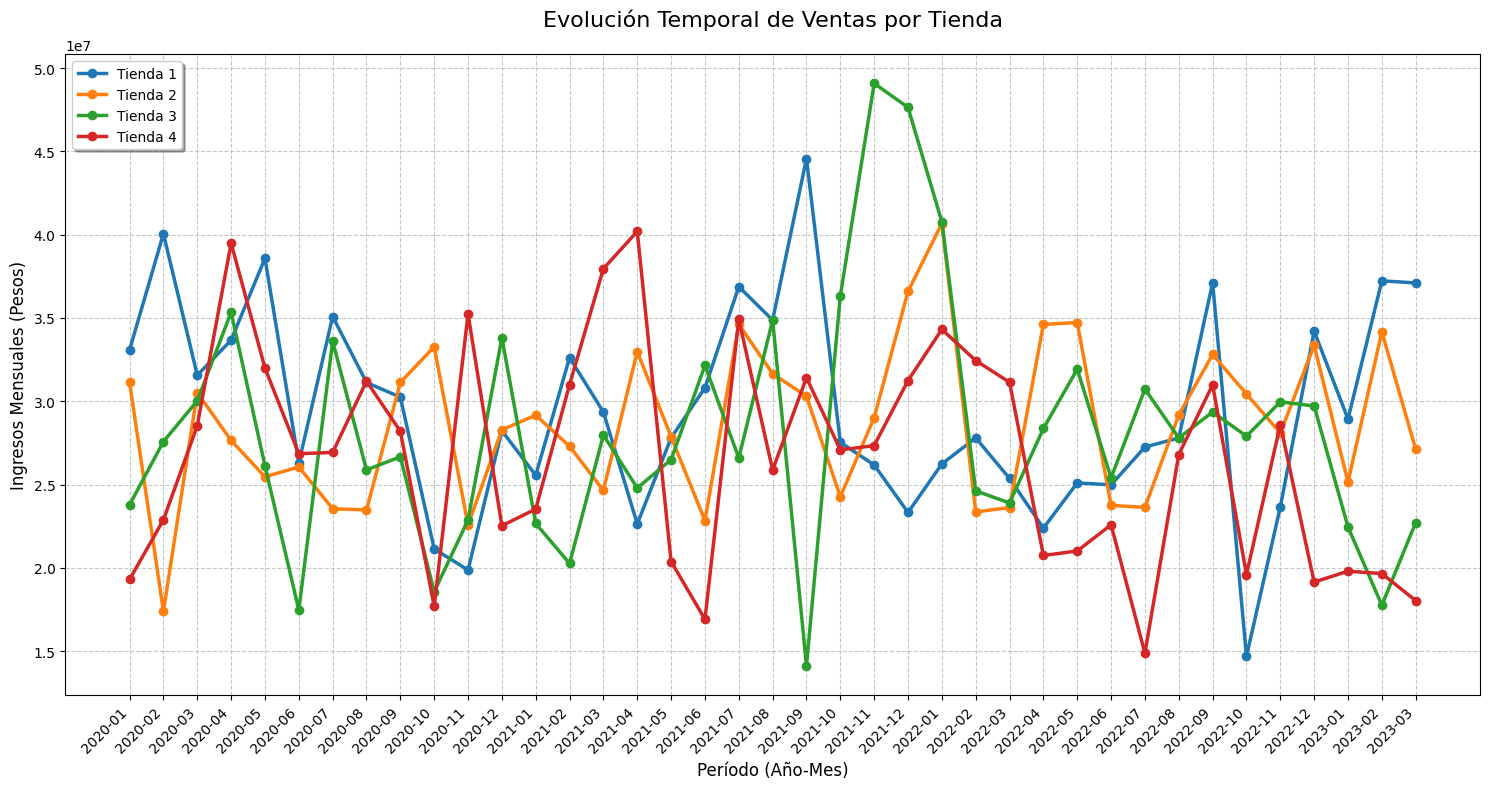

Análisis de Tendencias por Tienda:

Tienda 1:
  • Tendencia general: +12.1%
  • Promedio mensual: 29,509,754 pesos
  • Variabilidad: 21.0% (coef. de variación)
  • Estado: 📈 CRECIMIENTO

Tienda 2:
  • Tendencia general: -12.9%
  • Promedio mensual: 28,624,192 pesos
  • Variabilidad: 16.8% (coef. de variación)
  • Estado: 📉 DECLIVE

Tienda 3:
  • Tendencia general: -4.5%
  • Promedio mensual: 28,154,349 pesos
  • Variabilidad: 26.0% (coef. de variación)
  • Estado: ➡️ ESTABLE

Tienda 4:
  • Tendencia general: -6.6%
  • Promedio mensual: 26,625,018 pesos
  • Variabilidad: 25.0% (coef. de variación)
  • Estado: 📉 DECLIVE


In [8]:
# Preparamos los datos temporales para cada tienda
def preparar_datos_temporales(df_tienda, nombre_tienda):
    # Convertimos la fecha a datetime
    df_temp = df_tienda.copy()
    df_temp['Fecha de Compra'] = pd.to_datetime(df_temp['Fecha de Compra'], format='%d/%m/%Y')
    
    # Extraemos año y mes
    df_temp['Año_Mes'] = df_temp['Fecha de Compra'].dt.to_period('M')
    
    # Agrupamos por mes y sumamos los ingresos
    ventas_mensuales = df_temp.groupby('Año_Mes')['Precio'].sum().reset_index()
    ventas_mensuales['Tienda'] = nombre_tienda
    
    return ventas_mensuales

# Preparamos los datos para las 4 tiendas
ventas_t1 = preparar_datos_temporales(tienda, 'Tienda 1')
ventas_t2 = preparar_datos_temporales(tienda2, 'Tienda 2')
ventas_t3 = preparar_datos_temporales(tienda3, 'Tienda 3')
ventas_t4 = preparar_datos_temporales(tienda4, 'Tienda 4')

# Combinamos todos los datos
ventas_todas = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], ignore_index=True)

# Convertimos el período a string para mejor manejo
ventas_todas['Año_Mes_str'] = ventas_todas['Año_Mes'].astype(str)

# Creamos el gráfico
plt.figure(figsize=(15, 8))

# Definimos colores consistentes con los gráficos anteriores
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Graficamos cada tienda
for i, tienda_nombre in enumerate(tiendas):
    datos_tienda = ventas_todas[ventas_todas['Tienda'] == tienda_nombre]
    
    # Ordenamos por fecha
    datos_tienda = datos_tienda.sort_values('Año_Mes')
    
    plt.plot(
        datos_tienda['Año_Mes_str'], 
        datos_tienda['Precio'],
        marker='o',
        linewidth=2.5,
        markersize=6,
        color=colores[i],
        label=tienda_nombre
    )

# Configuramos la apariencia del gráfico
plt.title('Evolución Temporal de Ventas por Tienda', fontsize=16, pad=20)
plt.xlabel('Período (Año-Mes)', fontsize=12)
plt.ylabel('Ingresos Mensuales (Pesos)', fontsize=12)

# Rotamos las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadimos grilla para mejor lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Configuramos la leyenda
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Calculamos algunas estadísticas adicionales para el análisis
print("Análisis de Tendencias por Tienda:")
print("=" * 50)

for tienda_nombre in tiendas:
    datos_tienda = ventas_todas[ventas_todas['Tienda'] == tienda_nombre].sort_values('Año_Mes')
    
    if len(datos_tienda) > 1:
        # Calculamos la tendencia (diferencia entre último y primer mes)
        primer_mes = datos_tienda.iloc[0]['Precio']
        ultimo_mes = datos_tienda.iloc[-1]['Precio']
        tendencia = ((ultimo_mes - primer_mes) / primer_mes) * 100
        
        # Calculamos la variabilidad (desviación estándar)
        variabilidad = datos_tienda['Precio'].std()
        promedio_mensual = datos_tienda['Precio'].mean()
        coef_variacion = (variabilidad / promedio_mensual) * 100
        
        print(f"\n{tienda_nombre}:")
        print(f"  • Tendencia general: {tendencia:+.1f}%")
        print(f"  • Promedio mensual: {promedio_mensual:,.0f} pesos")
        print(f"  • Variabilidad: {coef_variacion:.1f}% (coef. de variación)")
        
        if tendencia > 5:
            print(f"  • Estado: 📈 CRECIMIENTO")
        elif tendencia < -5:
            print(f"  • Estado: 📉 DECLIVE")
        else:
            print(f"  • Estado: ➡️ ESTABLE")

## Grafico 3

Gráfico de barras apiladas para categorías de productos por tienda
Este gráfico revelará qué categorías son las más exitosas en cada tienda y también mostrará los porcentajes por tienda respecto al total de cada categoria.

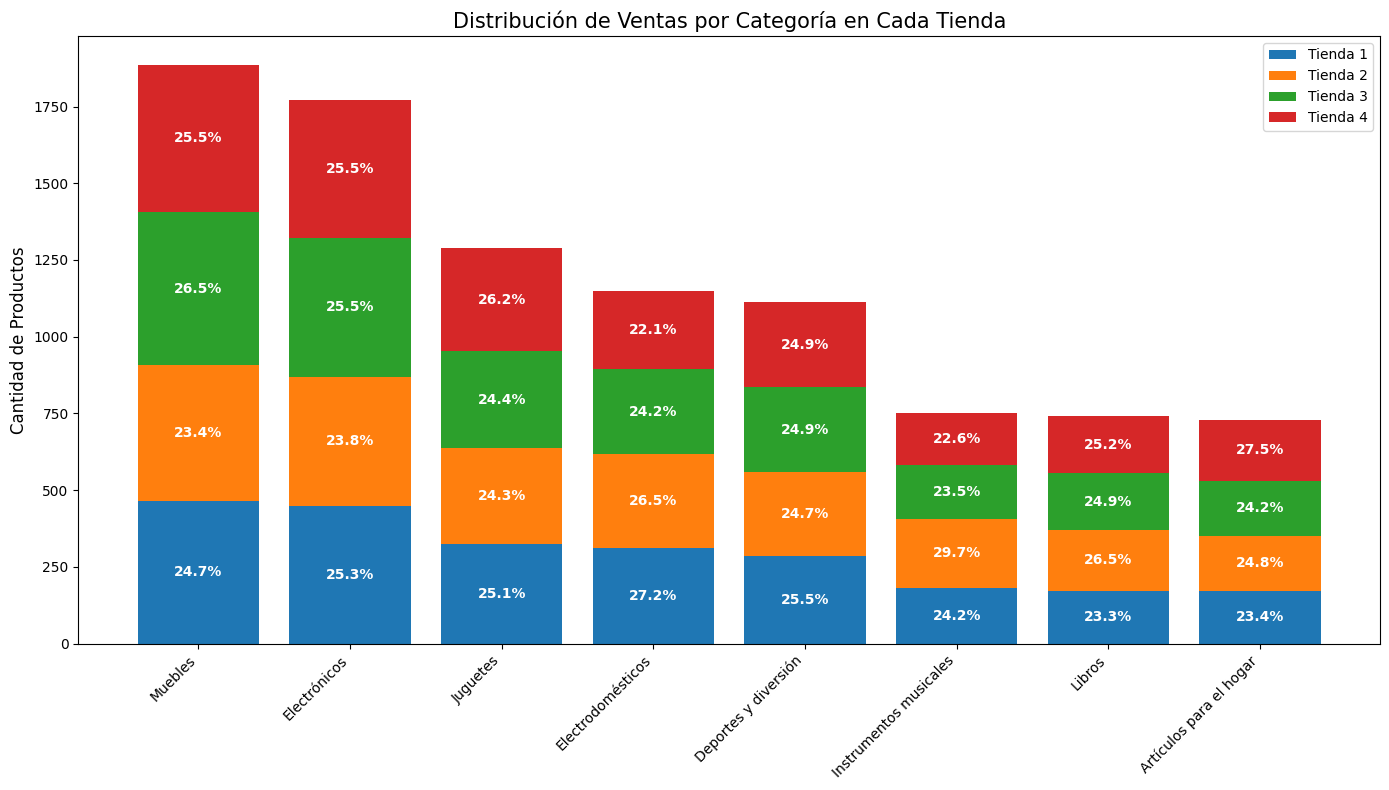

In [9]:
# Preparamos los datos para el gráfico de barras apiladas
categorias = categorias_combinadas['Categoría'].tolist()
tienda1_valores = categorias_combinadas['Cantidad Tienda 1'].tolist()
tienda2_valores = categorias_combinadas['Cantidad Tienda 2'].tolist() 
tienda3_valores = categorias_combinadas['Cantidad Tienda 3'].tolist()
tienda4_valores = categorias_combinadas['Cantidad Tienda 4'].tolist()

# Calculamos los totales por categoría para los porcentajes
totales_categoria = categorias_combinadas['Total'].tolist()

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Definimos la posición de las barras
indice = range(len(categorias))

# Creamos las barras apiladas
barra1 = ax.bar(indice, tienda1_valores, label='Tienda 1', color='#1f77b4')
barra2 = ax.bar(indice, tienda2_valores, bottom=tienda1_valores, label='Tienda 2', color='#ff7f0e')

# Calculamos las posiciones para las siguientes barras
bottom_temp = [i + j for i, j in zip(tienda1_valores, tienda2_valores)]
barra3 = ax.bar(indice, tienda3_valores, bottom=bottom_temp, label='Tienda 3', color='#2ca02c')

# Actualizamos las posiciones
bottom_temp = [i + j + k for i, j, k in zip(tienda1_valores, tienda2_valores, tienda3_valores)]
barra4 = ax.bar(indice, tienda4_valores, bottom=bottom_temp, label='Tienda 4', color='#d62728')

# Añadimos porcentajes dentro de cada sección de las barras
def añadir_porcentajes(barras, valores, posicion_base, totales):
    for i, (barra, valor, total) in enumerate(zip(barras, valores, totales)):
        # Solo añadimos texto si el porcentaje es significativo (>3%)
        if valor/total > 0.03:  # Para evitar texto en barras muy pequeñas
            porcentaje = f'{valor/total*100:.1f}%'
            # Calculamos la posición central de la barra (vertical)
            y_pos = posicion_base[i] + valor/2
            ax.text(i, y_pos, porcentaje, ha='center', va='center', 
                   color='white', fontweight='bold')

# Definimos las posiciones base para cada capa de la barra de forma explícita
posicion_base1 = [0] * len(categorias)
posicion_base2 = tienda1_valores
posicion_base3 = [i + j for i, j in zip(tienda1_valores, tienda2_valores)]
posicion_base4 = [i + j + k for i, j, k in zip(tienda1_valores, tienda2_valores, tienda3_valores)]

# Añadimos los porcentajes para cada tienda usando las bases correctas
añadir_porcentajes(barra1, tienda1_valores, posicion_base1, totales_categoria)
añadir_porcentajes(barra2, tienda2_valores, posicion_base2, totales_categoria)
añadir_porcentajes(barra3, tienda3_valores, posicion_base3, totales_categoria) # <-- CORRECCIÓN: Usamos la base correcta
añadir_porcentajes(barra4, tienda4_valores, posicion_base4, totales_categoria)

# Configuramos la apariencia del gráfico
ax.set_title('Distribución de Ventas por Categoría en Cada Tienda', fontsize=15)
ax.set_ylabel('Cantidad de Productos', fontsize=12)
ax.set_xticks(indice)
ax.set_xticklabels(categorias, rotation=45, ha='right')

# Añadimos la leyenda
ax.legend(loc='upper right')

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Informe de Análisis de Datos de Alura Store

Informe Final:
Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

# Informe Estratégico de Portafolio: Recomendación de Venta para AluraStore Latam



### Análisis de rendimiento y recomendación para la venta de una tienda:



1. Introducción: Propósito del Análisis

El presente informe tiene como objetivo proporcionar una recomendación clara y basada en datos sobre qué tienda del portafolio "AluraStore Latam" debería ser vendida. La decisión se fundamenta en un análisis integral del rendimiento de las cuatro tiendas, considerando métricas clave como ingresos, popularidad de categorías, satisfacción del cliente, costos operativos y, fundamentalmente, la trayectoria de crecimiento de cada una. El objetivo es optimizar el portafolio, desinvirtiendo en el activo de menor rendimiento para concentrar recursos en las operaciones más rentables y con mayor potencial.




2. Desarrollo: Hallazgos Clave del Análisis Comparativo

Antes de llegar a una conclusión, es crucial destacar que no todos los factores analizados son diferenciadores. Ciertas fortalezas son comunes a todo el portafolio:


*Satisfacción del Cliente Homogénea*: Todas las tiendas gozan de una excelente reputación, con calificaciones promedio casi idénticas y altas, que varían mínimamente entre 3.98 y 4.05. Esto indica que la calidad del producto y la experiencia del cliente son consistentes y no constituyen una debilidad en ninguna de las tiendas.


*Estructura de Costos de Envío Estandarizada*: El costo de envío representa un 5.33% del precio promedio del producto de manera uniforme en las cuatro tiendas. Esto sugiere una política de envíos centralizada y eficiente, que tampoco sirve como factor para diferenciar un activo de bajo rendimiento.


*Cartera de Productos Similar*: Las categorías más vendidas, como Muebles y Electrónicos, son las mismas en todo el portafolio, lo que indica una estrategia de inventario unificada.

La decisión, por tanto, debe basarse en los indicadores que sí muestran una divergencia significativa en el rendimiento: los ingresos totales y la tendencia de ventas a lo largo del tiempo.



--------------------------------------------------------------------


El siguiente gráfico de barras resume los ingresos totales, estableciendo una primera jerarquía de rendimiento financiero.

Gráfico 1: Ingresos Totales por Tienda. Se observa que la Tienda 1 es la líder indiscutible en ingresos, mientras que la Tienda 4 genera la menor facturación total.

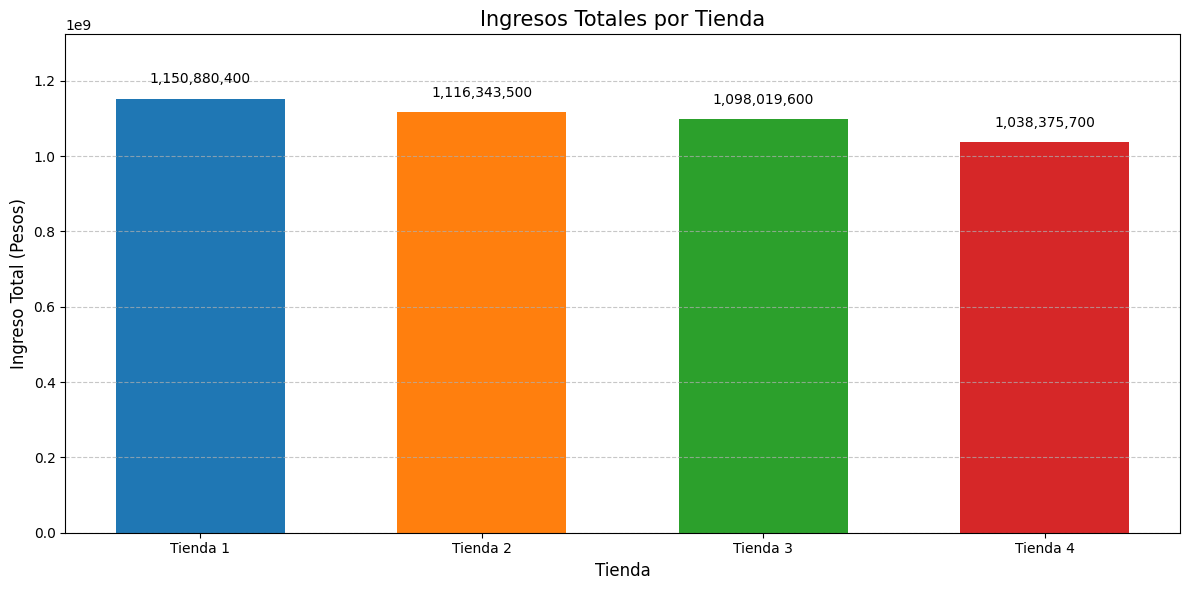


Sin embargo, el análisis más revelador es la evolución de las ventas, que nos indica la salud y dirección futura de cada negocio.

Gráfico 2: Evolución Temporal de Ventas. Este gráfico es crítico y muestra:
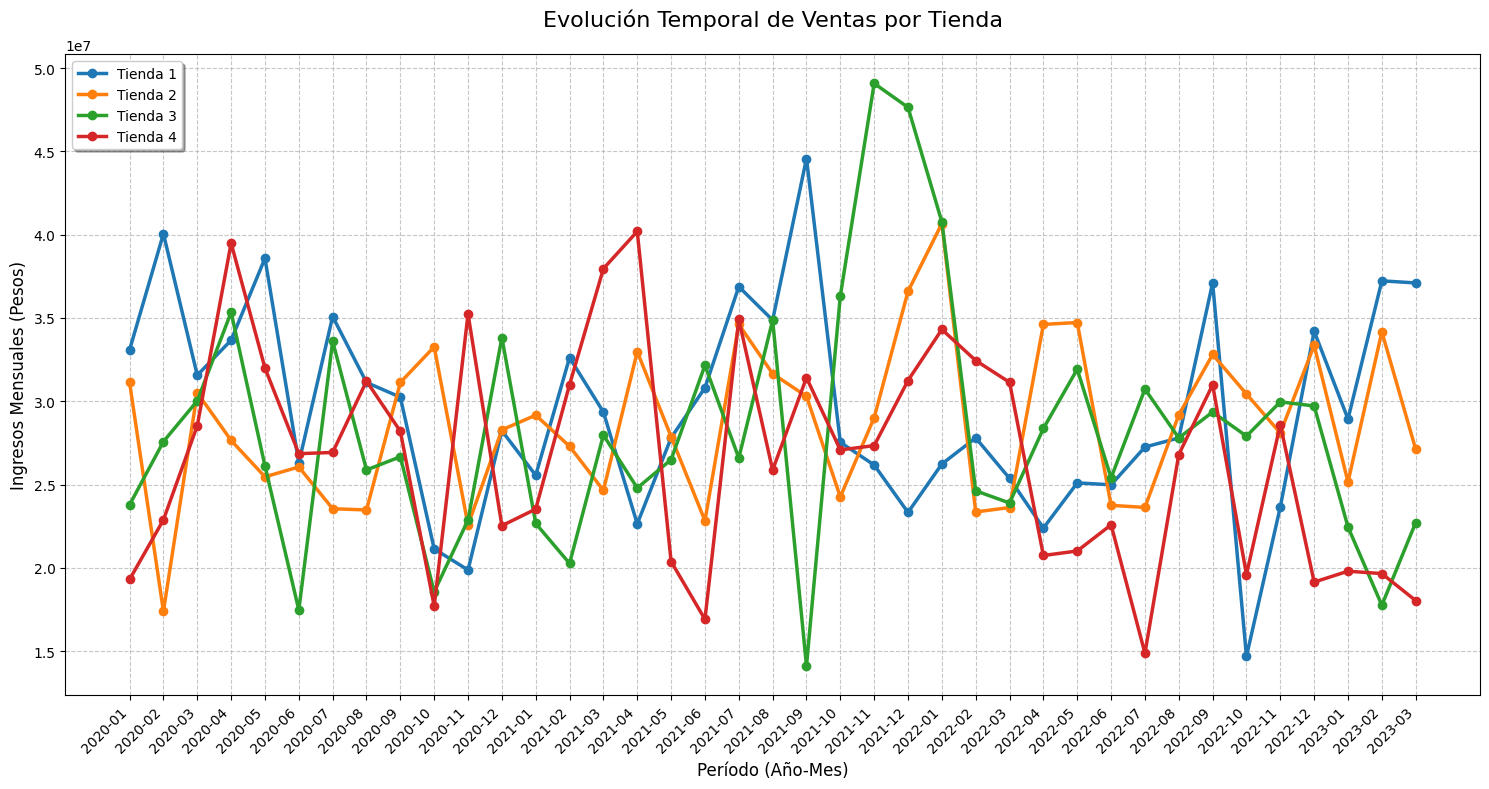


Tienda 1: La única tienda con una trayectoria de crecimiento claro y positivo (+12.1%).


Tienda 3: Se mantiene relativamente estable.


Tienda 2 y Tienda 4: Ambas están en una clara tendencia de declive. La Tienda 2 muestra el declive más pronunciado (-12.9%).

3. Conclusión y Recomendación Final

La evidencia apunta de manera concluyente a que las Tiendas 2 y 4 son las de peor rendimiento. Si bien la Tienda 2 presenta la tasa de declive más preocupante, la Tienda 4 combina dos factores negativos decisivos:

Es la que genera los menores ingresos totales de todo el portafolio.

Su tendencia de ventas está en declive (-6.6%), confirmando que su bajo rendimiento no es una anomalía, sino una trayectoria sostenida.

*Recomendación: Vender la Tienda 4*.

Justificación: La Tienda 4 es el activo con el rendimiento histórico más bajo y sin signos de recuperación. Su venta representa la decisión más lógica para optimizar el portafolio. Liberará capital y enfoque de gestión que pueden ser reinvertidos en la Tienda 1 para acelerar su crecimiento, o utilizados para revitalizar la Tienda 3. Aunque la Tienda 2 también es motivo de preocupación por su rápido declive, la Tienda 4 es, sin lugar a dudas, el eslabón más débil en términos de contribución global al negocio.



Analista de Datos Jr.  Bastian Araya Ch.